In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import glob


In [4]:
data= pd.read_csv('top_1000_pe_imports.csv')

In [18]:
data.head(10)

,hash,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
0,071e8c3f8922e186e57548cd4c703a5d,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,33f8e6d08a6aae939f25a8e0d63dd523,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,b68abd064e975e1c6d5f25e748663076,1,1,1,1,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,72049be7bd30ea61297ea624ae198067,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,c9b3700a77facf29172f32df6bc77f48,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5,cc6217be863e606e49da90fee2252f52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,f7a1a3c38809d807b3f5f4cc00b1e9b7,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
7,a2597ae310f53a6b70c6951a3245dc4a,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
8,164b56522eb24164184460f8523ed7e2,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
9,56ae1459ba61a14eb119982d6ec793d7,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
data.shape

(47580, 1002)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47580 entries, 0 to 47579
Columns: 1002 entries, hash to malware
dtypes: int64(1001), object(1)
memory usage: 363.7+ MB


In [6]:
data.columns

Index(['hash', 'GetProcAddress', 'ExitProcess', 'WriteFile', 'GetLastError',
       'CloseHandle', 'FreeLibrary', 'Sleep', 'GetStdHandle',
       'MultiByteToWideChar',
       ...
       'bind', 'RegEnumKeyExA', 'WinHttpOpen', '_controlfp', 'WinExec',
       'GetSecurityDescriptorDacl', 'FindFirstFreeAce', 'GetTimeFormatW',
       'LookupAccountSidW', 'malware'],
      dtype='object', length=1002)

In [7]:
data.describe()

,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
count,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,...,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000,47580.000000
mean,0.872236,0.847079,0.760004,0.783459,0.770618,0.683501,0.665826,0.669966,0.756578,0.674107,...,0.024800,0.024590,0.024401,0.024359,0.024275,0.024191,0.024149,0.023939,0.023686,0.959458
std,0.333830,0.359915,0.427085,0.411891,0.420440,0.465115,0.471706,0.470230,0.429152,0.468713,...,0.155518,0.154874,0.154292,0.154163,0.153903,0.153643,0.153513,0.152860,0.152072,0.197229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 정상 , 악성 비율

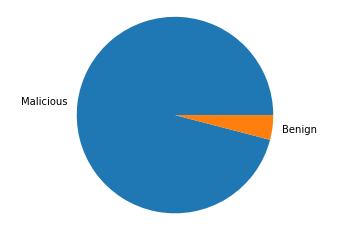

In [5]:
%matplotlib inline

labels=['Malicious', 'Benign']
sizes=[data['malware'].value_counts()[1],
     data['malware'].value_counts()[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,)
ax1.axis('equal')
plt.show()




In [9]:
data.columns.tolist() , len(data.columns.tolist())

(['hash',
  'GetProcAddress',
  'ExitProcess',
  'WriteFile',
  'GetLastError',
  'CloseHandle',
  'FreeLibrary',
  'Sleep',
  'GetStdHandle',
  'MultiByteToWideChar',
  'GetCurrentThreadId',
  'FindClose',
  'LeaveCriticalSection',
  'EnterCriticalSection',
  'VirtualAlloc',
  'DeleteCriticalSection',
  'WideCharToMultiByte',
  'RegCloseKey',
  'ReadFile',
  'SetFilePointer',
  'GetCurrentProcess',
  'GetACP',
  'UnhandledExceptionFilter',
  'RaiseException',
  'RtlUnwind',
  'TlsGetValue',
  'TlsSetValue',
  'GetModuleHandleW',
  'GetCPInfo',
  'GetCurrentProcessId',
  'VirtualFree',
  'GetDC',
  'GetModuleFileNameW',
  'CreateFileW',
  'SetEndOfFile',
  'SetLastError',
  'GetCommandLineW',
  'DestroyWindow',
  'QueryPerformanceCounter',
  'VirtualQuery',
  'ShowWindow',
  'GetFileType',
  'TerminateProcess',
  'HeapFree',
  'HeapAlloc',
  'CreateThread',
  'BeginPaint',
  'EndPaint',
  'GlobalAlloc',
  'GetModuleHandleA',
  'GetCommandLineA',
  'GetWindowRect',
  'DeleteObject',
  '

In [27]:
data=data.drop(['hash'],axis=1)

In [20]:
x_data.head(10)

,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1,1,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
7,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
8,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
9,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [28]:
data.head(5)

,GetProcAddress,ExitProcess,WriteFile,GetLastError,CloseHandle,FreeLibrary,Sleep,GetStdHandle,MultiByteToWideChar,GetCurrentThreadId,...,bind,RegEnumKeyExA,WinHttpOpen,_controlfp,WinExec,GetSecurityDescriptorDacl,FindFirstFreeAce,GetTimeFormatW,LookupAccountSidW,malware
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1,1,1,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [24]:
hash_func = list(data['hash'])

In [25]:
hash_func

['071e8c3f8922e186e57548cd4c703a5d',
 '33f8e6d08a6aae939f25a8e0d63dd523',
 'b68abd064e975e1c6d5f25e748663076',
 '72049be7bd30ea61297ea624ae198067',
 'c9b3700a77facf29172f32df6bc77f48',
 'cc6217be863e606e49da90fee2252f52',
 'f7a1a3c38809d807b3f5f4cc00b1e9b7',
 'a2597ae310f53a6b70c6951a3245dc4a',
 '164b56522eb24164184460f8523ed7e2',
 '56ae1459ba61a14eb119982d6ec793d7',
 'c4148ca91c5246a8707a1ac1fd1e2e36',
 'fb7569d1c2c1fa36a97fdc732f51a637',
 'e7ac6a2de45506164777941faf953094',
 '1282837376a698e38af5cca54bdfbdd0',
 '2688d03495ba17054a9a65028a0a80f8',
 '2109cd66383a81926aef367530a2a9fc',
 '96bb462a8e7e5af2d2834677173e454b',
 '2a1e576d411c5d5370e381042f973ea5',
 'b77933644b8a9fd5c22cad19b21dfb30',
 '8220417d83184f62f5734a0c1d140e89',
 'a36c063345128d22bf1dd003af2eb36d',
 '4c9b84877211d5ba1ae0bd681b01bfec',
 '5e16e45f22fd546b4b52e45ca031e5c5',
 'bcd1ba1f7c6cab26c02c8bec3e5989de',
 '0a4005119dc2d49221b28ed5765fb773',
 'cbf532ac41a42fb819f1cdbf2239c1db',
 '0e20e8fd3a42d387620d0c194ade6673',
 

In [29]:
flag=0
for column in data.columns.tolist():
    if data[column].nunique()!=2:
        print(column+ " has more than 2 unique values")
        flag=1

if flag==0:
    print("All columns have 2 values only")

All columns have 2 values only


In [30]:
for col in data.columns.tolist():
    print(col)

GetProcAddress
ExitProcess
WriteFile
GetLastError
CloseHandle
FreeLibrary
Sleep
GetStdHandle
MultiByteToWideChar
GetCurrentThreadId
FindClose
LeaveCriticalSection
EnterCriticalSection
VirtualAlloc
DeleteCriticalSection
WideCharToMultiByte
RegCloseKey
ReadFile
SetFilePointer
GetCurrentProcess
GetACP
UnhandledExceptionFilter
RaiseException
RtlUnwind
TlsGetValue
TlsSetValue
GetModuleHandleW
GetCPInfo
GetCurrentProcessId
VirtualFree
GetDC
GetModuleFileNameW
CreateFileW
SetEndOfFile
SetLastError
GetCommandLineW
DestroyWindow
QueryPerformanceCounter
VirtualQuery
ShowWindow
GetFileType
TerminateProcess
HeapFree
HeapAlloc
CreateThread
BeginPaint
EndPaint
GlobalAlloc
GetModuleHandleA
GetCommandLineA
GetWindowRect
DeleteObject
SetWindowPos
GetClientRect
SelectObject
LoadLibraryExW
GlobalLock
GlobalUnlock
GetSystemMetrics
IsWindow
GetSysColor
GetDeviceCaps
MulDiv
IsDebuggerPresent
InvalidateRect
SetTimer
LoadLibraryA
IsWindowVisible
HeapSize
GetStartupInfoW
GetFileSize
TranslateMessage
FillRect
V

In [32]:

mal_data = data.loc[data['malware']==1]
normal = data.loc[data['malware']==0]

In [33]:
normal.shape, mal_data.shape

((1929, 1001), (45651, 1001))

# raw data로부터 api 추출

In [168]:
def extract_api(jsonfile):
    api =[]
    apilist = jsonfile['static']['pe_imports']
    
    
    for i in range(len(apilist)):

        apilist_index = apilist[i]['imports']

        for j in range(len(apilist_index)):
            #print(apilist_index[j])
            #print(apilist_index[j]['name'])
            
            if apilist_index[j]['name'] == None:
                
                pass
            
            else:
                api.append(apilist_index[j]['name'])
            
    
    return api
            






In [176]:
def extract_api(jsonfile):
    
    
    try:
        api =[]
        apilist = jsonfile['static']['pe_imports']
        
        for i in range(len(apilist)):

            apilist_index = apilist[i]['imports']

            for j in range(len(apilist_index)):
                #print(apilist_index[j])
                #print(apilist_index[j]['name'])

                if apilist_index[j]['name'] == None:

                    pass

                else:
                    api.append(apilist_index[j]['name'])
                    
    except KeyError as e:
        return


            
    
    return api
            







In [154]:
with open("00cd476df3369702da00006f29b44c98.json") as file:
    a = json.load(file)
    
    
    
    

In [179]:
path='/Users/suminbae/Python-Workspace/System_Malware_project/static/mal/*.json'
used_apis=set() # 사용된 api

print("start data preprocessing")

x_data={}
i=0

for code in glob.glob(path):
    i+=1
    file_name=code.split('/')[-1]
    
#     print(code)
#     print(file_name)
    
    
    
    with open(code) as json_file:
        json_data=json.load(json_file)
        
        x_data[file_name]=extract_api(json_data)
        
#         if i==10:
#             break
        
    
print("over")    
    
    
        
        
        
    
    
        
        
        
        
    
    

start data preprocessing
over


In [183]:
x_data['01e1eadf62c26974fba71b611d4f877b.json']

['GetConsoleWindow',
 'GetLastError',
 'CreateIoCompletionPort',
 'DeleteCriticalSection',
 'InitializeCriticalSectionAndSpinCount',
 'CloseHandle',
 'VerifyVersionInfoW',
 'VerSetConditionMask',
 'WaitForSingleObject',
 'QueueUserAPC',
 'TerminateThread',
 'InterlockedExchangeAdd',
 'WaitForMultipleObjects',
 'InterlockedDecrement',
 'GetQueuedCompletionStatus',
 'SetWaitableTimer',
 'InterlockedExchange',
 'InterlockedIncrement',
 'PostQueuedCompletionStatus',
 'InterlockedCompareExchange',
 'SetLastError',
 'LeaveCriticalSection',
 'EnterCriticalSection',
 'TlsFree',
 'TlsAlloc',
 'TlsSetValue',
 'TlsGetValue',
 'DecodePointer',
 'WriteConsoleW',
 'SetFilePointerEx',
 'GetConsoleMode',
 'GetConsoleCP',
 'FlushFileBuffers',
 'HeapReAlloc',
 'HeapSize',
 'SetStdHandle',
 'GetFileType',
 'GetProcessHeap',
 'SetEnvironmentVariableA',
 'FreeEnvironmentStringsW',
 'LocalFree',
 'FormatMessageA',
 'SetEvent',
 'ResetEvent',
 'WaitForSingleObjectEx',
 'CreateEventW',
 'GetModuleHandleW',
 '

In [188]:
for apis in x_data.values():
    print(a
       

['_CorExeMain']
['_CorExeMain']
['MultiByteToWideChar', 'WideCharToMultiByte', 'MulDiv', 'GlobalUnlock', 'RtlMoveMemory', 'GlobalFree', 'GlobalLock', 'GlobalAlloc', 'CancelWaitableTimer', 'SetWaitableTimer', 'CreateWaitableTimerA', 'TerminateProcess', 'OpenProcess', 'Module32First', 'CloseHandle', 'Process32Next', 'Process32First', 'CreateToolhelp32Snapshot', 'GetModuleFileNameA', 'GetModuleHandleA', 'HeapFree', 'GetWindowsDirectoryA', 'LCMapStringA', 'LoadLibraryA', 'GetProcAddress', 'FreeLibrary', 'Sleep', 'WritePrivateProfileStringA', 'GetTickCount', 'WriteFile', 'GetEnvironmentVariableA', 'CreateFileA', 'GetFileSize', 'ReadFile', 'IsBadReadPtr', 'HeapReAlloc', 'ExitProcess', 'LocalSize', 'HeapAlloc', 'GetCurrentProcessId', 'GetProcessHeap', 'lstrlenW', 'GetTempPathA', 'DeleteDC', 'Rectangle', 'BitBlt', 'StretchBlt', 'GetPixel', 'GetStockObject', 'GetObjectA', 'CreateCompatibleDC', 'CreateDIBSection', 'DeleteObject', 'CombineRgn', 'CreateRoundRectRgn', 'CreateSolidBrush', 'CreatePat